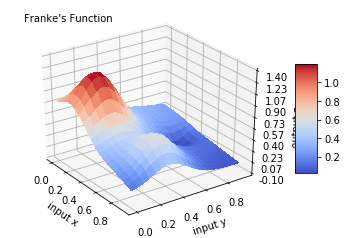

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np 
from random import random, seed
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
a = np.arange(0, 1, 0.05)
b = np.arange(0, 1, 0.05) 
a, b = np.meshgrid(a,b)
def FrankeFunction(a,b):
    term1 = 0.75*np.exp(-(0.25*(9*a-2)**2) - 0.25*((9*b-2)**2))
    term2 = 0.75*np.exp(-((9*a+1)**2)/49.0 - 0.1*(9*b+1))
    term3 = 0.5*np.exp(-(9*a-7)**2/4.0 - 0.25*((9*b-3)**2))
    term4 = -0.2*np.exp(-(9*a-4)**2 - (9*b-7)**2) 
    return term1 + term2 + term3 + term4
c = FrankeFunction(a, b)

# Plot the surface.
surf = ax.plot_surface(a, b, c, cmap=cm.coolwarm, linewidth=0, antialiased=False)

 
# Set rotation angle to -35 degrees
ax.view_init(azim=-35)


# Customize the axis.
ax.text2D(0.05, 0.95, "Franke's Function", transform=ax.transAxes)
plt.xlabel('input x')
plt.ylabel('input y')
ax.set_zlabel('output z')
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()




In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

# use seed=1 to reproduce results
np.random.seed(0)

# creating the data
x = np.random.uniform(0,1,1000) 
y = np.random.uniform(0,1,1000)
noise=0.01*np.random.randn(1000)
z = FrankeFunction(x, y) + noise


    

In [8]:
#import packages from scikit learn for lasso regression
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# create design matrix
xy=np.c_[x,y]
poly5 = PolynomialFeatures(degree=5)
XY = poly5.fit_transform(xy)

# find penalty with sklearn cross validation
lassocv=linear_model.LassoCV(max_iter=50000)
lassocv.fit(XY,z)
alpha=lassocv.alpha_
print('alpha= ',lassocv.alpha_)

# perform lasso regression with sklearn
lasso5=linear_model.Lasso(alpha,max_iter=50000)
lasso5.fit(XY,z)
zpredictlasso=lasso5.predict(XY)

# lasso coefficients
betalasso=lasso5.coef_
betalasso[0]=lasso5.intercept_

np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
print('Lasso coefficients')
print(np.c_[np.arange(1,22),betalasso])

alpha=  6.195052407405262e-05
Lasso coefficients
[[ 1.        1.003891]
 [ 2.        0.      ]
 [ 3.        0.672433]
 [ 4.       -3.764696]
 [ 5.        1.200551]
 [ 6.       -3.517855]
 [ 7.        3.773347]
 [ 8.        0.637246]
 [ 9.       -0.      ]
 [10.        0.      ]
 [11.        0.      ]
 [12.        0.      ]
 [13.       -0.      ]
 [14.       -0.6438  ]
 [15.        2.204063]
 [16.       -1.044952]
 [17.       -0.301484]
 [18.       -0.      ]
 [19.       -0.      ]
 [20.       -0.14924 ]
 [21.       -0.      ]]


In [10]:
R2scotestsk = r2_score(z,zpredictlasso)
MSEtestsk = sklearn.metrics.mean_squared_error(z,zpredictlasso)

print('MSE  :', MSEtestsk)
print('R2   :',R2scotestsk)



MSE  : 0.006715856445679427
R2   : 0.9200763157703206


In [11]:
# k-crossvalidation, we choose k =10, that means we get 10 partitions
k=10

import random
#generating random partitions of our data 

#generating random order of data points
for j in range(0,len(z)):
    switchindex = random.choice(range(0,len(z)))
    switchvalueX = x[j]
    switchvalueY = y[j]
    switchvalueZ = z[j]
    x[j] =x[switchindex]
    y[j] =y[switchindex]
    z[j] =z[switchindex]
    x[switchindex] =switchvalueX
    y[switchindex] =switchvalueY
    z[switchindex] =switchvalueZ

    
partitionsize = int(len(z)/k)
index = 0
#alphav=np.array([1e-5,1e-4,1e-3,1e-2])
#lengtha=len(alphav)
resultmatrixMSE=np.empty(k)
resultmatrixR2=np.empty(k)
poly5 = PolynomialFeatures(degree=5)

mean_MSE_R2 = np.c_[(np.array(range(2,6))),np.zeros(4),np.zeros(4)]     #Matrix containing average MSE & R2 per degree
#making sure there are zeros in the matrix
for j in range(0,4):
    mean_MSE_R2[j][1]=0
    mean_MSE_R2[j][2]=0


partitionnumber = 1
for k in range(1,k+1):
    print('Partition ',partitionnumber)
    print()
    testx = x[index:index+partitionsize]                                #testdata
    testy = y[index:index+partitionsize]
    testz = z[index:index+partitionsize]
    trainingx =  np.concatenate((x[:index],x[index+partitionsize:]))    #trainingdata
    trainingy =  np.concatenate((y[:index],y[index+partitionsize:]))
    trainingz =  np.concatenate((z[:index],z[index+partitionsize:]))

    
    degree = 5
    print(' degree ',degree)
        
    # create design matrix
    xy_train=np.c_[trainingx,trainingy]
    xy_test=np.c_[testx,testy]
    XY_train = poly5.fit_transform(xy_train)
    XY_test = poly5.fit_transform(xy_test)

    # find penalty with sklearn cross validation
    lassocv=linear_model.LassoCV(max_iter=50000)
    lassocv.fit(XY_train,trainingz)
    alpha=lassocv.alpha_
    print('alpha= ',lassocv.alpha_)

    # perform lasso regression with sklearn
    lasso5=linear_model.Lasso(alpha,max_iter=50000)
    lasso5.fit(XY_train,trainingz)
    zpredictlassocv=lasso5.predict(XY_test)                               #predicting values for the testset

        
    
    MSEtest = mean_squared_error(testz,zpredictlassocv)                                       #comparing predicted and real value
    R2scotest = r2_score(testz,zpredictlassocv)
        
    print('   MSE   : ',MSEtest)
    print('   R2    : ',R2scotest)
        
    resultmatrixMSE[k-1]=MSEtest
    resultmatrixR2[k-1]=R2scotest
        
    print()
    index = index+partitionsize
    partitionnumber += 1
    
    
print('----------------------------------------------------------------')
print()



Partition  1

 degree  5
alpha=  6.288409636957292e-05
   MSE   :  0.006087847931728046
   R2    :  0.9217869782353509

Partition  2

 degree  5
alpha=  6.086155529737533e-05
   MSE   :  0.006424955029192282
   R2    :  0.9322382992597353

Partition  3

 degree  5
alpha=  6.224083944833249e-05
   MSE   :  0.008057050880293785
   R2    :  0.9087932611213946

Partition  4

 degree  5
alpha=  6.197005550020508e-05
   MSE   :  0.00783199582765384
   R2    :  0.8996761736365885

Partition  5

 degree  5
alpha=  6.1540578214735e-05
   MSE   :  0.00782962140141335
   R2    :  0.9161327024183046

Partition  6

 degree  5
alpha=  6.20182979434841e-05
   MSE   :  0.00611145712837445
   R2    :  0.9230801893541717

Partition  7

 degree  5
alpha=  6.126951890420893e-05
   MSE   :  0.006724457189497015
   R2    :  0.9207139945058649

Partition  8

 degree  5
alpha=  6.243621461011021e-05
   MSE   :  0.0054989655604460955
   R2    :  0.9269932192216198

Partition  9

 degree  5
alpha=  6.2392872611

In [12]:
m=np.mean(resultmatrixMSE)
n=np.mean(resultmatrixR2)
print('MSE average    :', np.mean(resultmatrixMSE[:][1]))
print('R2  average     :',np.mean(resultmatrixR2[:][1]))

MSE average    : 0.006424955029192282
R2  average     : 0.9322382992597353


In [14]:
xplot = np.arange(0, 1, 0.05)
yplot = np.arange(0, 1, 0.05) 

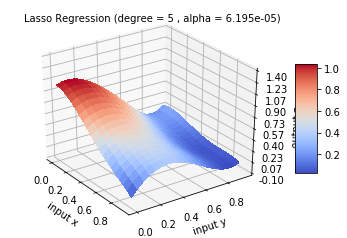

In [17]:
#testplot of the polynomial fit Lasso (degree 5)
xplot = np.arange(0, 1, 0.05)
yplot = np.arange(0, 1, 0.05)
fig = plt.figure()
ax = fig.gca(projection='3d')
lengthxplot=len(xplot)


beta=betalasso


zplot=np.zeros((lengthxplot,lengthxplot))

for k in range(0,lengthxplot):
    xk=xplot[k]
    for j in range(0,lengthxplot):
        yj=yplot[j]
        
        designmatrixrow = np.array([1,xk,yj,xk**2, xk*yj, yj**2, \
                                   xk**3, xk**2*yj, xk*yj**2, yj**3, \
                                   xk**4, xk**3*yj, xk**2*yj**2, xk*yj**3,yj**4, \
                                   xk**5, xk**4*yj, xk**3*yj**2, xk**2*yj**3,xk*yj**4,yj**5 \
                                   ])
        zplot[j,k]=designmatrixrow.dot(beta)
                                   
xplot, yplot = np.meshgrid(xplot,yplot)

# Plot the surface.
surf = ax.plot_surface(xplot, yplot, zplot, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Set rotation angle to -35 degrees
ax.view_init(azim=-35)

# Customize the axis
ax.text2D(0.05, 0.95, "Lasso Regression (degree = 5 , alpha = 6.195e-05)", transform=ax.transAxes)
plt.xlabel('input x')
plt.ylabel('input y')
ax.set_zlabel('output z')
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

    



